In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [25]:
data = pd.read_csv(r"D:\DBDA\Adavance Stats\Day 6\creditcard.csv")
print(data.head(3))       

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


C:\Users\dbda\AppData\Local\Temp\ipykernel_21732\3809637430.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Class']).plot.bar()


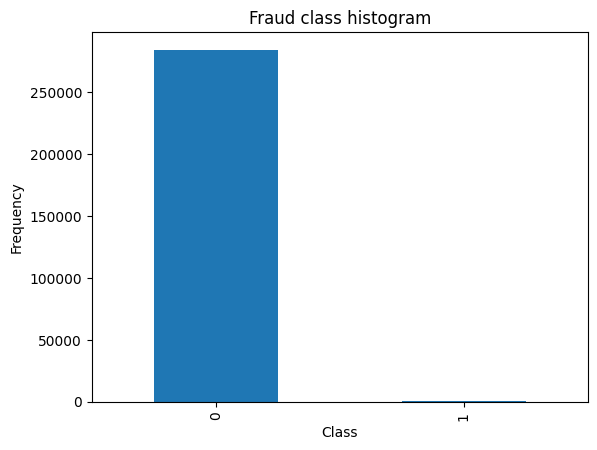

In [26]:
# note that column v1 to v28 are encoded columns , original content suppressed because of confidentiality
# plot thr histogram of 'Class' variable 
pd.value_counts(data['Class']).plot.bar()
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel('Frequency')
data['Class'].value_counts()
plt.show()

In [27]:
# we see that almost all the records are in non fraud category data is imbalanced


In [28]:
# Standardize the 'Amount' column and drop the 'Time' and 'Amount' columns 
from sklearn.preprocessing import StandardScaler
data['normAmount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))


In [29]:
# now that column has been scaled to a normal distribution of -1 to `, remove the original amount of the column and also the time column

data = data.drop(['Time','Amount'], axis=1)
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  normAmount  
0  0.

In [30]:
#separate  features (X) and target variable (y)

X =np.array(data.iloc[:,data.columns != 'Class'])
y =np.array(data.iloc[:,data.columns == 'Class'])

print("Shape of X :{}".format(X.shape))
print("shape of y :{}".format(y.shape))

Shape of X :(284807, 29)
shape of y :(284807, 1)


In [31]:
#split the dataset into the training and test dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test =train_test_split(X,y,test_size=0.3,random_state=0)


In [32]:
#print information about the shapes of the training and testing sets

print("No of transactions X_train Dataset : ",X_train.shape)
print("No of transactions X_test Dataset : ",X_test.shape)
print("No of transactions y_train Dataset : ",y_train.shape)
print("No of transactions y_test Dataset : ",y_test.shape)

No of transactions X_train Dataset :  (199364, 29)
No of transactions X_test Dataset :  (85443, 29)
No of transactions y_train Dataset :  (199364, 1)
No of transactions y_test Dataset :  (85443, 1)


In [33]:
# print the class distribiution before and after oversampling with SMOTE

print("Before oversampling , counts of label '1' : {}".format(sum(y_train==1)))

print("Before oversampling , count of label '0' : {} \n".format(sum(y_train==0)))

Before oversampling , counts of label '1' : [345]
Before oversampling , count of label '0' : [199019] 



In [34]:
sm = SMOTE(random_state=2) #Put a fixed seed for reproducibility
X_train_res , y_train_res =sm.fit_resample(X_train,y_train.ravel())

print("After oversampling the shape of X_train : {}".format(X_train_res.shape))
print("After oversampling the shape of y_train : {}".format(y_train_res.shape))


print("After oversampling , counts of label '1' : {}".format(sum(y_train_res==1)))

print("After oversampling , count of label '0' : {} \n".format(sum(y_train_res==0)))


After oversampling the shape of X_train : (398038, 29)
After oversampling the shape of y_train : (398038,)
After oversampling , counts of label '1' : 199019
After oversampling , count of label '0' : 199019 



In [35]:
#use GridSearchCV to find the best hyperparameter for logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [36]:
# defines a dictionary parameters where the key is 'C' ,representing the regularization parameter in Log reg , and the associated values are generated using 
#np.linspace(1,10,10).

parameters ={'C':np.linspace(1,10,10)}
lr=LogisticRegression()

In [37]:
# lr : The base estimator (LR in this case).
#parameters : The dictionary of hyperparameter value t search over

#cv :5 The number of folds for the cross-validation .It performs 5-fold-cross validation ,dividing the dataset into 
#5 subsets and training the model 5 times each usning a different subset as the test set

#verbose =5 Controls the verbosity during the grid search .A higher value(5 in this case) means more info will be printed during the search.

#n_jobs =3 Number od CPU cores to use for the parallel compuattion . setting into the 3 means using 3 CPu cores for faster compuatation 


clf =GridSearchCV(lr,parameters,cv=5,verbose=5,n_jobs=3)

In [38]:
#the fit method is called on GridDearchCV object ,and it performs an exhaustive search over the specified parameters valyes. It find the best hyperparameter
#that maximize the performance metric(default is accuracy) based on cross validation . The training data(X_train_res, oversampled using smote ,and y_train_res)
# is used for this process.

#the ravel() function in NumPy is used to flatten or reshape arrays .   When applied to an array , it returns a contiguous flattened array , i.e. 1D array
#containing all the elements  of original array


clf.fit(X_train_res,y_train_res.ravel())
print(clf.best_params_)

# Traing Logistic Regression with the best hyperparameter



Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 9.0}


In [39]:
lr1 =LogisticRegression(C=4,penalty='l1',solver='liblinear',verbose=5)
lr1.fit(X_train_res,y_train_res.ravel())

[LibLinear]

LogisticRegression(C=4, penalty='l1', solver='liblinear', verbose=5)

In [40]:
#function to plot the confusuion materix 
import itertools 
from sklearn.metrics import confusion_matrix,roc_curve,auc


def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix ',cmap=plt.cm.Blues):


    #this function prints and plots the Conf MAtrix
    #normalization can be applied by setting normalization=True
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

        thresh =cm.max()/2

        for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
            plt.text(j,i,cm[i,j],horizontalalignment="centre",color='white ' if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label ")
    

In [41]:
# evaluate the model on training dataset
y_train_pre =lr1.predict(X_train)
cnf_matrix_tra =confusion_matrix(y_train,y_train_pre)

Recall metric on training dataset: 92.17391304347827%


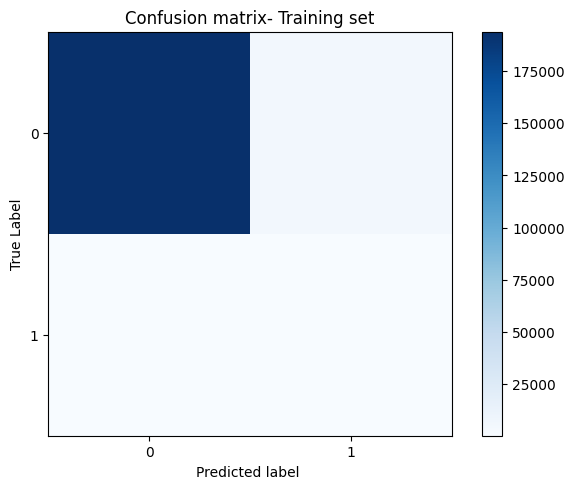

In [42]:
# print recall metric on the training dataset
print("Recall metric on training dataset: {}%".format(100* cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+ cnf_matrix_tra[1,1])))


#Plot conf matrix for the training dataset

class_names =[0,1]
plt.figure()

plot_confusion_matrix(cnf_matrix_tra,classes=class_names,title="Confusion matrix- Training set")
plt.show()

In [43]:
#Evaluate the model on Testing set 

y_pre = lr1.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pre)

#print recall metric on the testing dataset
print("Recall metric on testing dataset: {}%".format(100* cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+ cnf_matrix_tra[1,1])))



Recall metric on testing dataset: 92.17391304347827%


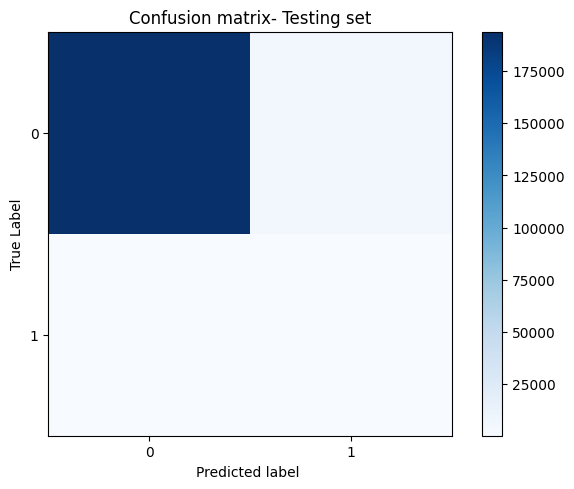

In [44]:
#Plot conf matrix for the training dataset

class_names =[0,1]
plt.figure()

plot_confusion_matrix(cnf_matrix_tra,classes=class_names,title="Confusion matrix- Testing set")
plt.show()